In [24]:
import pandas as pd
import matplotlib.pyplot as plt
df_GDP=pd.read_csv("GDP.csv")
df_INF=pd.read_csv("INF.csv")
df_UNEMP=pd.read_csv("UNEMP.csv")

In [25]:
# First of all, as i want to perform a 30 year analysis on the 3 datasets (30 years is the best period talking about consistency in these dataset), i need to drop and clean 

df_GDP=df_GDP.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68'])
df_GDP.set_index('Country Name', inplace=True)
df_INF=df_INF.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68'])
df_INF.set_index('Country Name', inplace=True)
df_UNEMP=df_UNEMP.drop(columns=['Country Code', 'Indicator Name', 'Indicator Code', 'Unnamed: 68'])
df_UNEMP.set_index('Country Name', inplace=True)

In [26]:
df_GDP = df_GDP.loc[:, df_GDP.columns.astype(int) > 1993]
df_INF = df_INF.loc[:, df_INF.columns.astype(int) > 1993]
df_UNEMP = df_UNEMP.loc[:, df_UNEMP.columns.astype(int) > 1993]

In [27]:
#Good! Now that we have the same raws and columns for every dataframe, we need to check what is still NaN and drop
df_GDP.isnull().sum()
df_GDP=df_GDP.dropna().copy()
df_INF=df_INF.dropna().copy()

In [28]:
#Now as we want to work on the same countries in every Df, we need to filter them by index
common_index = df_GDP.index.intersection(df_UNEMP.index).intersection(df_INF.index)

# DF filtering 
df_GDP_filtered = df_GDP.loc[common_index]
df_UNEMP_filtered = df_UNEMP.loc[common_index]
df_INF_filtered = df_INF.loc[common_index]

np.float64(-0.5710719084072342)

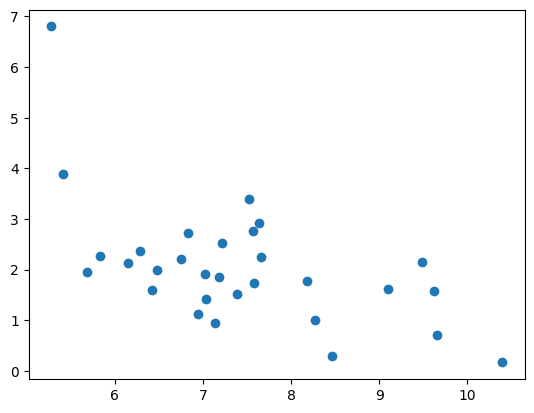

In [29]:
# Checking the Phillip's Curve!
plt.scatter(df_UNEMP_filtered.loc['Canada'], df_INF_filtered.loc['Canada'])
df_UNEMP_filtered.loc['Canada'].corr(df_INF_filtered.loc['Canada'])

#The result is pretty good: there is a moderate negative correlation between inflation and unemployment in Canada.

np.float64(-0.23450834263887863)

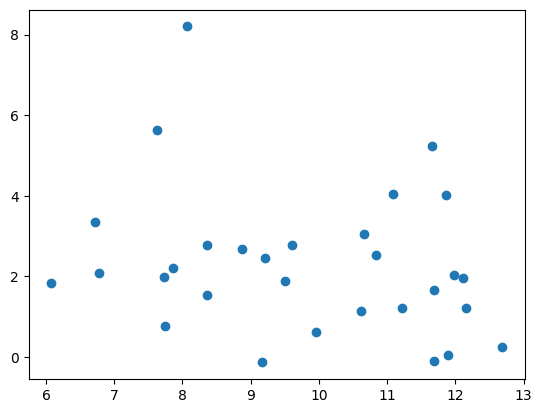

In [30]:
#And for Italy? There is a weaker correlation. We can explain the difference lookting at the italian labour market, that is less dynamic  

plt.scatter(df_UNEMP_filtered.loc['Italy'], df_INF_filtered.loc['Italy'])
df_UNEMP_filtered.loc['Italy'].corr(df_INF_filtered.loc['Italy'])